#### 모델 학습


딥러닝 모델의 학습 진행 방식을 결정하는 옵티마이저(optimizer)로 SGD(Stochastic Gradient Descent) 를 사용합니다. compile() 함수를 통해서 손실 함수(loss function), 옵티마이저(optimizer), 지표(metrics)를 지정합니다.

모델의 학습에 필요한 손실 함수로 mse를 지정하여 Mean Square Error를 사용하고, 옵티마이저는 정의했던 SGD를 사용합니다. 지표로는 mae와 mse를 사용하는데 여기서 MAE는 Mean Absolute Error를 의미합니다.

이제 모델 학습을 진행하기위해 fit() 함수를 호출합니다. 학습을 위해 x_train과 y_train를 지정하고, 학습 반복 횟수인 epochs를 40으로 지정합니다.

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, utils
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, n_features=1,
                       bias=5.0, noise=5.0, random_state=123)
y = np.expand_dims(y, axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=123)

model = keras.Sequential()
model.add(layers.Dense(1, activation='linear', input_shape=(1,)))
model.summary()

optimizer = optimizers.SGD()
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
history = model.fit(x_train, y_train, epochs=40)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/40
5/5 [==============================] - 0s 2ms/step - loss: 604.1657 - mae: 19.7363 - mse: 604.1657
Epoch 2/40
5/5 [==============================] - 0s 2ms/step - loss: 485.9576 - mae: 17.7645 - mse: 485.9576
Epoch 3/40
5/5 [==============================] - 0s 2ms/step - loss: 390.8428 - mae: 15.9239 - mse: 390.8428
Epoch 4/40
5/5 [==============================] - 0s 2ms/step - loss: 316.4797 - mae: 14.3399 - mse: 316.4797
Epoch 5/40
5/5 [==============================] - 0s 3ms/step - loss: 255.5393 - mae: 12.8869 - mse: 255.5393
Ep

모델이 학습하면서 각 epoch 마다 저장한 mae와 mse 지표를 차트를 통해서 확인합니다.

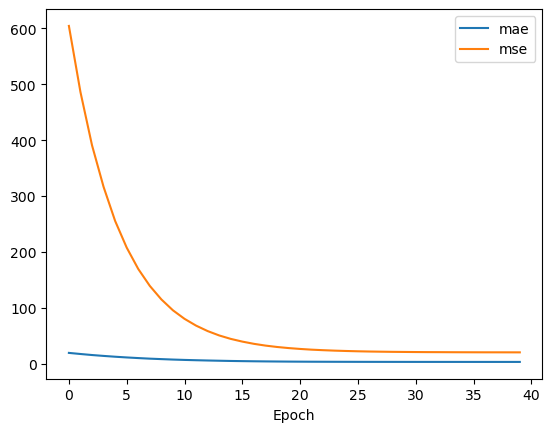

In [18]:
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.xlabel('Epoch')
plt.legend(['mae', 'mse'])
plt.show();

#### 모델 평가

이제 모델의 평가를 위해 evaluate() 함수를 이용하여 데이터셋인 x_test, y_test에 대해서 지표인 mae와 mse를 확인합니다.

In [19]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 21.9222 - mae: 3.9886 - mse: 21.9222


[21.922216415405273, 3.9886043071746826, 21.922216415405273]

#### 모델 예측

학습된 모델을 통해 입력 데이터 X에 대한 예측값을 predict()를 통해 결과로 받아옵니다. 실제 데이터의 결과값 y와 모델의 예측 결과인 result를 살펴봅니다.

7/7 [==============================] - 0s 1ms/step


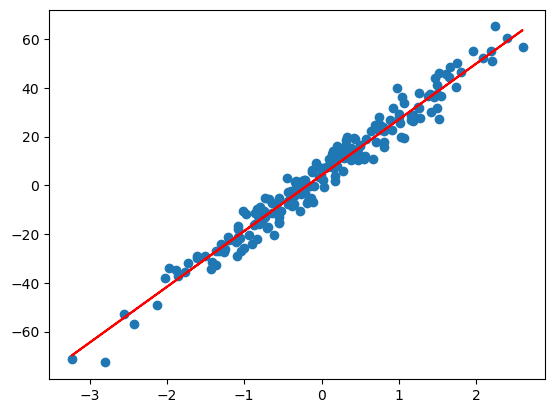

In [20]:
result = model.predict(X)

plt.scatter(X, y)
plt.plot(X, result, 'r')
plt.show()

딥러닝 모델에서 사용한 레이어를 layers로 접근하여 살펴볼 수 있습니다. 여기에서는 Dense 레이어 하나만 사용된 것을 알 수 있습니다.

In [21]:
model.layers

모델의 0번째 레이어인 layers[0]를 가져와서 layer.name으로 레이어의 이름을 확인할 수 있습니다. 또한, get_layer() 함수를 통해 같은 이름의 레이어를 얻을 수도 있습니다.

In [23]:
layer = model.layers[0]
print(layer.name)
layer = model.get_layer('dense_3')
print(layer.name)

dense_3
dense_3


레이어에서 사용하는 가중치(weights)와 바이어스(biases)를 get_weights() 함수를 통해서 얻을 수 있습니다. 즉, 레이어에 있는 가중치와 바이어스를 통해 선형 회귀식을 얻을 수 있습니다.

In [24]:
weights, biases = layer.get_weights()
print(weights)
print(biases)

[[22.905226]]
[4.173599]


딥러닝 모델에서 학습된 가중치(weights)와 바이어스(biases)를 통해 선형회귀식을 np.array(weights * X + biases)로 표현할 수 있습니다.

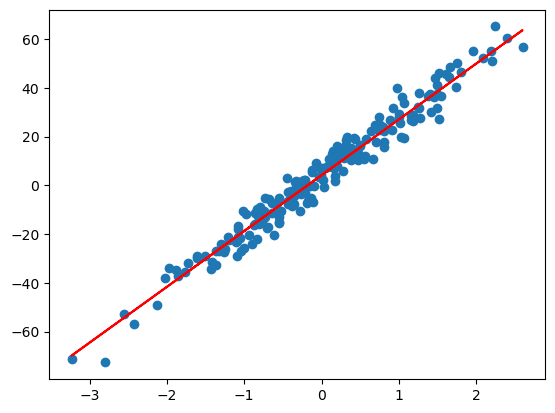

In [25]:
plt.scatter(X, y)
plt.plot(X, np.array(weights * X + biases), 'r')
plt.show()

#### 이번시간 정리

딥러닝 모델을 학습하는 구성과 관련 요소들을 이해했습니다.
모델이 잘 학습되고 있는지 비교를 위해 사용하는 손실함수에 대해서 이해했습니다.
모델이 어떻게 업데이트되어야 하는지 결정하는 옵티마이저에 대해서 이해했습니다.

Q.사람과 달리 딥러닝의 학습은 어떻게 이루어지는지 딥러닝을 처음 접하는 사람에게 설명하실 수 있을까요?

실제 정답과 딥러닝 모델이 예측한 정답을 비교하여 실제 정답에 가깝게 예측할 수 있도록 스스로 학습합니다.


GPT 답변

딥러닝의 학습은 인공신경망(Artificial Neural Network)이라는 구조로 이루어져 있습니다. 이 인공신경망은 여러개의 뉴런(Neuron)으로 구성되어있으며, 이 뉴런들이 데이터를 입력받아 처리하는 과정을 통해 학습이 이루어집니다.

인공신경망은 입력층(Input Layer), 은닉층(Hidden Layer), 출력층(Output Layer)으로 나누어져 있습니다. 입력층은 외부에서 데이터를 받아들이는 역할을 하며, 출력층은 인공신경망에서 결과를 출력하는 역할을 합니다. 중간에 위치한 은닉층은 입력층과 출력층 사이에서 신경망의 핵심 처리를 담당하는 층으로, 하나 이상의 은닉층을 가진 딥러닝 모델을 사용하는 경우도 많습니다.

인공신경망의 학습은 두 가지 단계로 이루어집니다. 첫번째는 순전파(Forward Propagation) 과정입니다. 입력층에서부터 시작하여 출력층에 도달하며, 각 층에서는 입력의 가중치 합과 편향(Bias)을 더한 값을 활성화 함수(Activation Function)에 적용하여 출력값을 계산합니다. 이러한 과정을 통해 입력값이 출력값에 매핑되는 활성화함수의 일종인 함수 approximator로서 동작합니다.

두번째 단계는 오차역전파(Back Propagation) 과정입니다. 출력값과 실제값 사이에서 생긴 오차를 이용하여 각 층에 대한 가중치의 기울기를 계산하고, 경사 하강법(Gradient Descent) 등의 최적화 알고리즘을 사용하여 이를 갱신합니다. 이를 반복하며 가중치와 편향이 최적화되며, 신경망은 더 정확한 예측 및 분류를 수행할 수 있게 됩니다.

딥러닝의 학습은 이와 같은 과정을 여러번 반복하면서 모델의 정확도를 개선해 나가는 것입니다. 이 과정에서는 대량의 데이터를 사용하여 모델을 학습시키며, GPU와 같은 하드웨어 가속기를 활용하여 학습 속도를 높일 수 있습니다.